In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import librosa

In [3]:
data_path = 'EEG_Data'

data = [[] for i in range(5)]

for i, dir in enumerate(os.listdir(data_path)):
    folder_path = os.path.join(data_path, dir)
    dirs = os.listdir(folder_path)
    
    for j, file in enumerate(dirs):
        if j==200:
            break
        file_path = os.path.join(folder_path, file)
        spectrogram = np.load(file_path)
        data[i].append(spectrogram)

In [4]:
concatenated_data_0 = np.concatenate(data[0], axis=1)
concatenated_data_1 = np.concatenate(data[1], axis=1)
concatenated_data_2 = np.concatenate(data[2], axis=1)
concatenated_data_3 = np.concatenate(data[3], axis=1)

concat_data = np.concatenate([concatenated_data_0, concatenated_data_1, concatenated_data_2, concatenated_data_3], axis=1)
concat_data = np.squeeze(concat_data)

In [5]:
concat_data.shape

(51, 47200)

In [6]:
# ddd = concat_data[:, :1000]
ddd = concatenated_data_0[:, :1000]
ddd = np.squeeze(ddd)

ddd.shape

(51, 1000)

In [7]:
# ddd = (ddd - np.mean(ddd)) / np.std(ddd)


In [8]:
np.max(ddd), np.min(ddd)

(0.0016127231341150532, 3.446908792473895e-10)

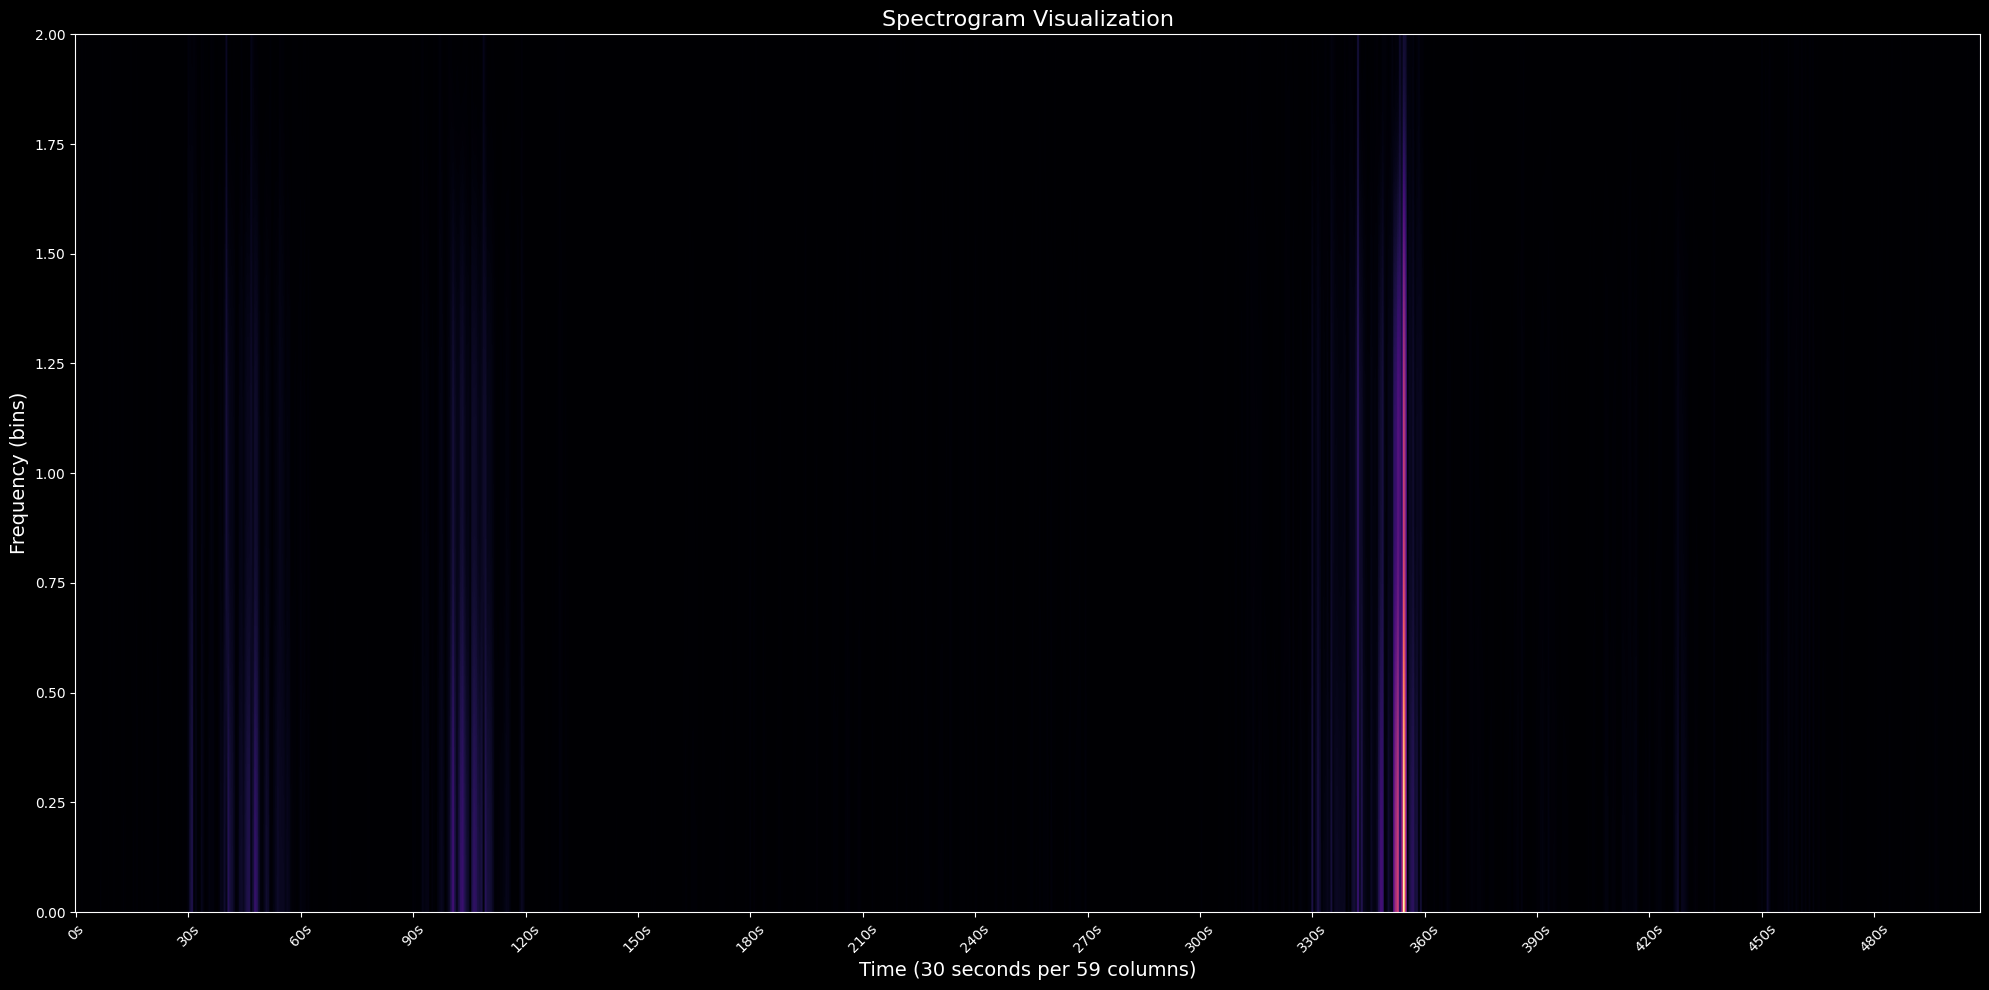

In [9]:
plt.figure(figsize=(20, 10))

plt.imshow(ddd*1e+1, aspect='auto', cmap='magma', origin='lower')
plt.title('Spectrogram Visualization', fontsize=16)
plt.xlabel('Time (30 seconds per 59 columns)', fontsize=14)
plt.ylabel('Frequency (bins)', fontsize=14)

num_segments = ddd.shape[1] // 59
x_ticks = [i * 59 for i in range(num_segments + 1)]
x_labels = [f"{i * 30}s" for i in range(num_segments + 1)]
plt.xticks(x_ticks, x_labels, rotation=45)
plt.ylim(0, 2)


plt.tight_layout()
plt.show()

In [10]:
num_segments = ddd.shape[1] // 59
x_ticks = [i * 59 for i in range(num_segments + 1)]
x_labels = [f"{i * 30}s" for i in range(num_segments + 1)]

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=ddd,
    colorscale='magma',
    colorbar=dict(title='Magnitude'),
))

# Update the layout
fig.update_layout(
    title='Spectrogram Visualization',
    xaxis=dict(
        title='Time (30 seconds per 59 columns)',
        tickvals=x_ticks,
        ticktext=x_labels
    ),
    yaxis=dict(
        title='Frequency (bins)',
        range=[np.min(ddd), np.max(ddd)+2] 
    ),
    width=1400, height=1000 
)

fig.show()

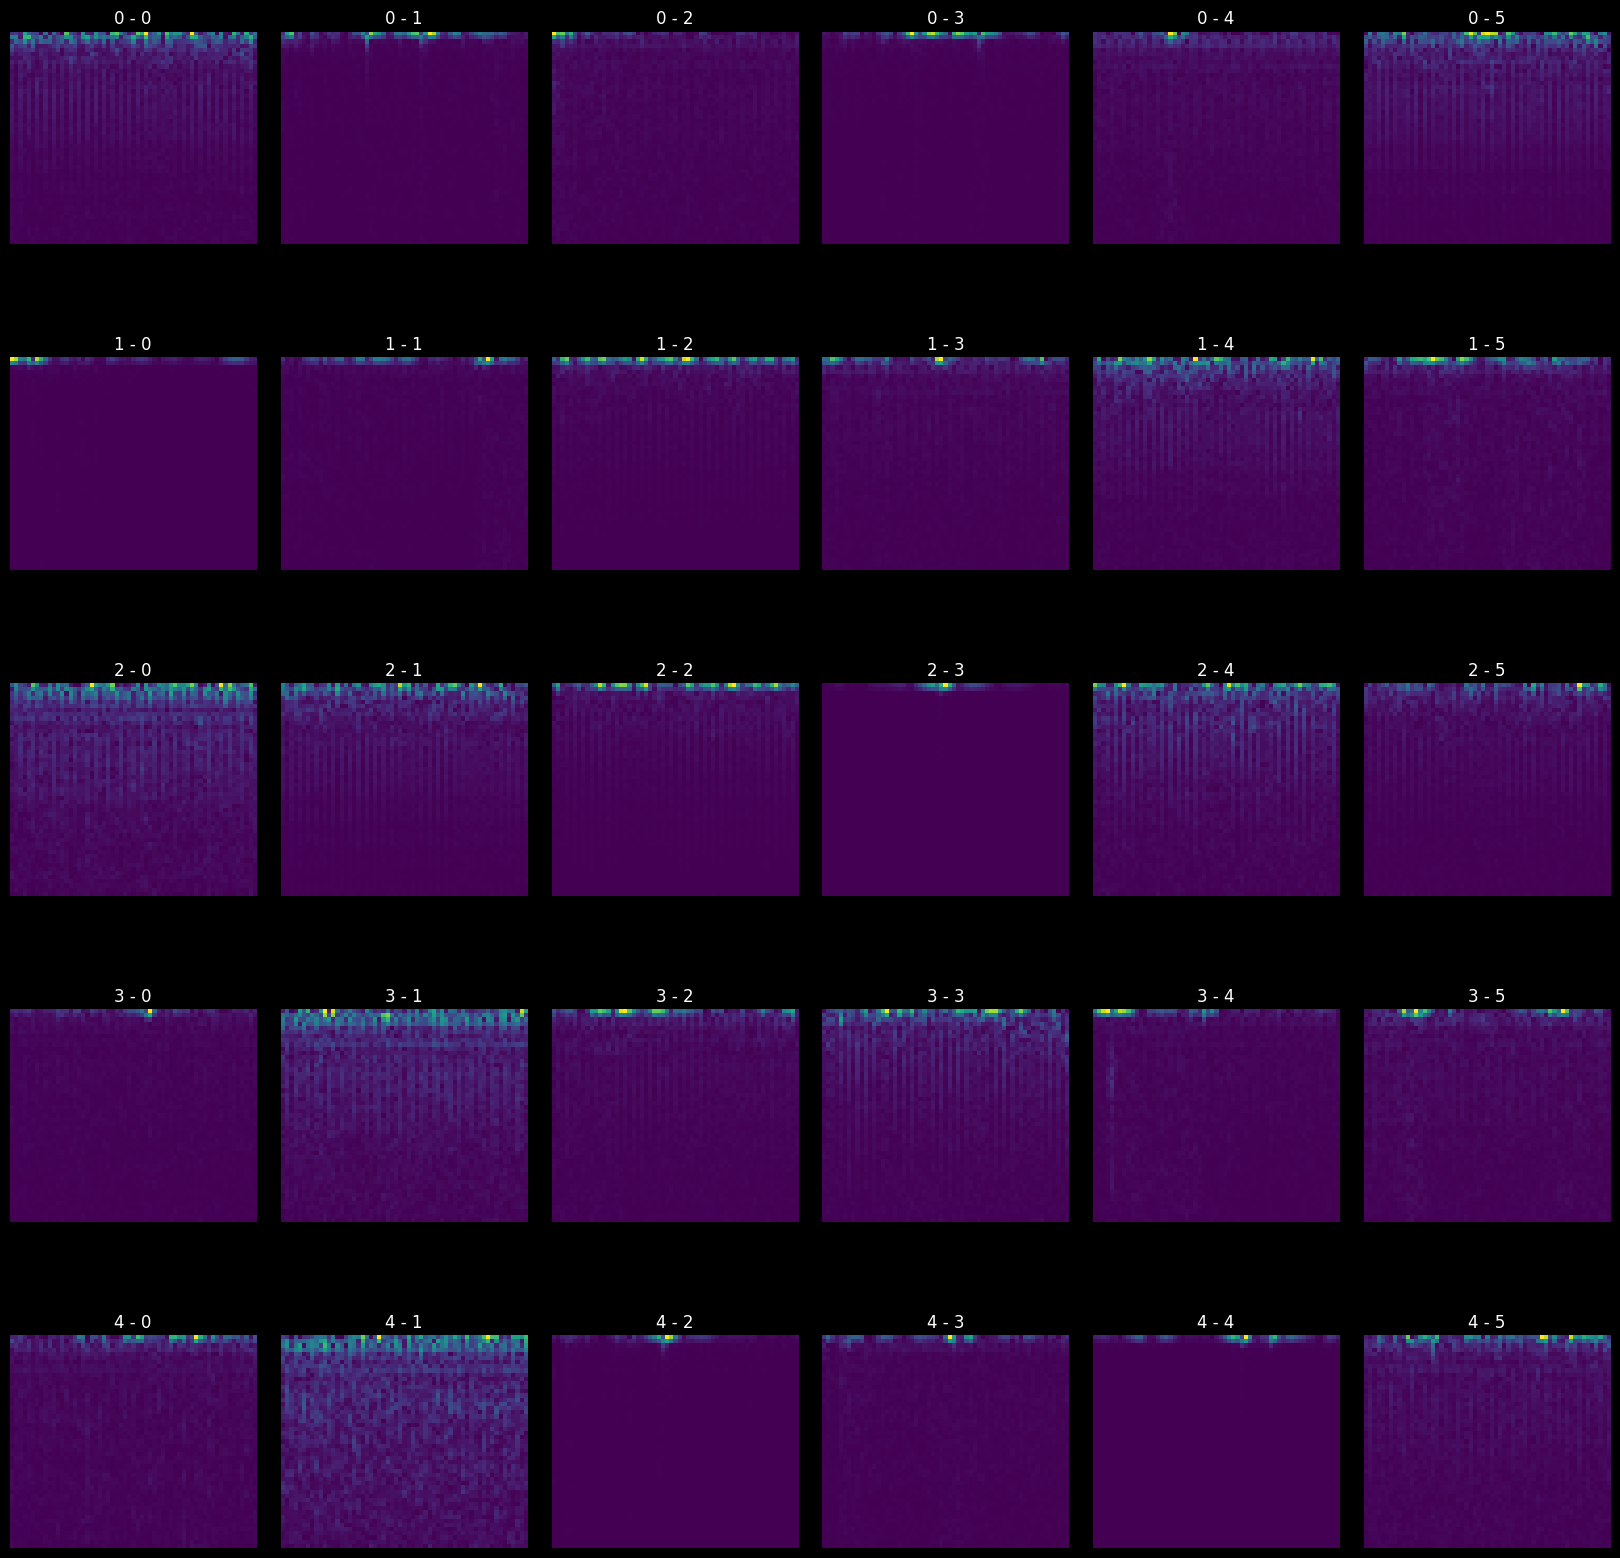

In [11]:
columns = 6

fig, axes = plt.subplots(5, columns, figsize=(20, 20))

for i in range(5):
    for j in range(columns):
        ax = axes[i, j]
        ax.imshow(data[i][j] * 100, interpolation='nearest')
        ax.axis('off')
        ax.set_title(f'{i} - {j}')  

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

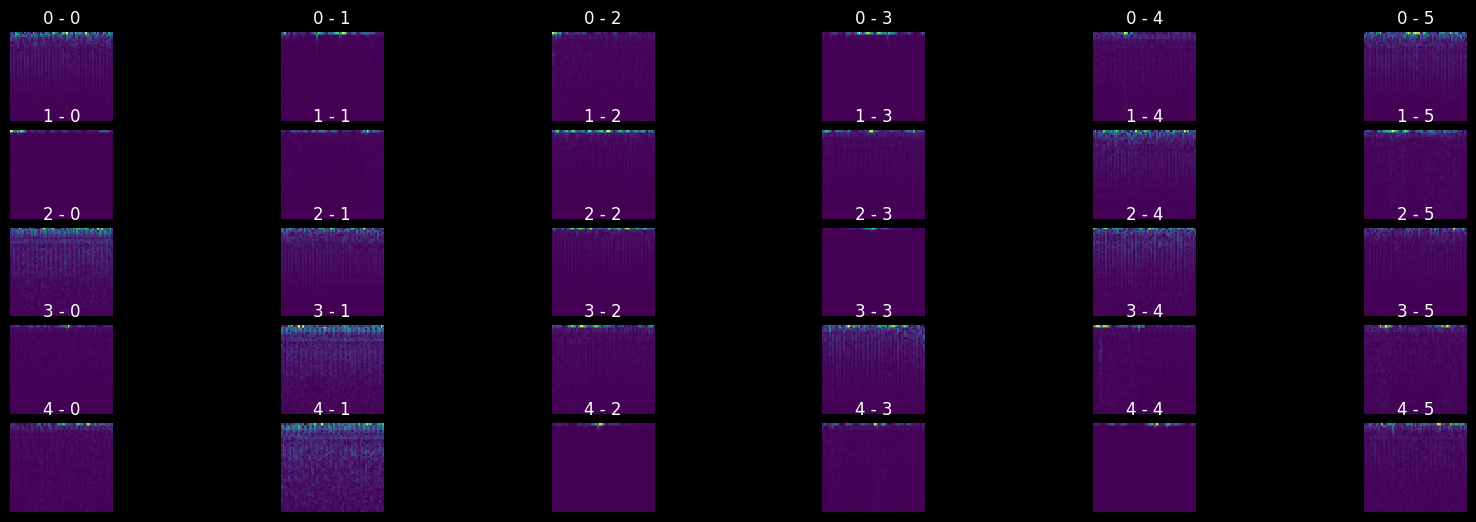

In [12]:
columns = 6

fig, axes = plt.subplots(5, columns, figsize=(20, 6))

for i in range(5):
    for j in range(columns):
        ax = axes[i, j]
        ax.imshow(data[i][j][:, :], interpolation='nearest')
        ax.axis('off')
        ax.set_title(f'{i} - {j}')  

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

In [13]:
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

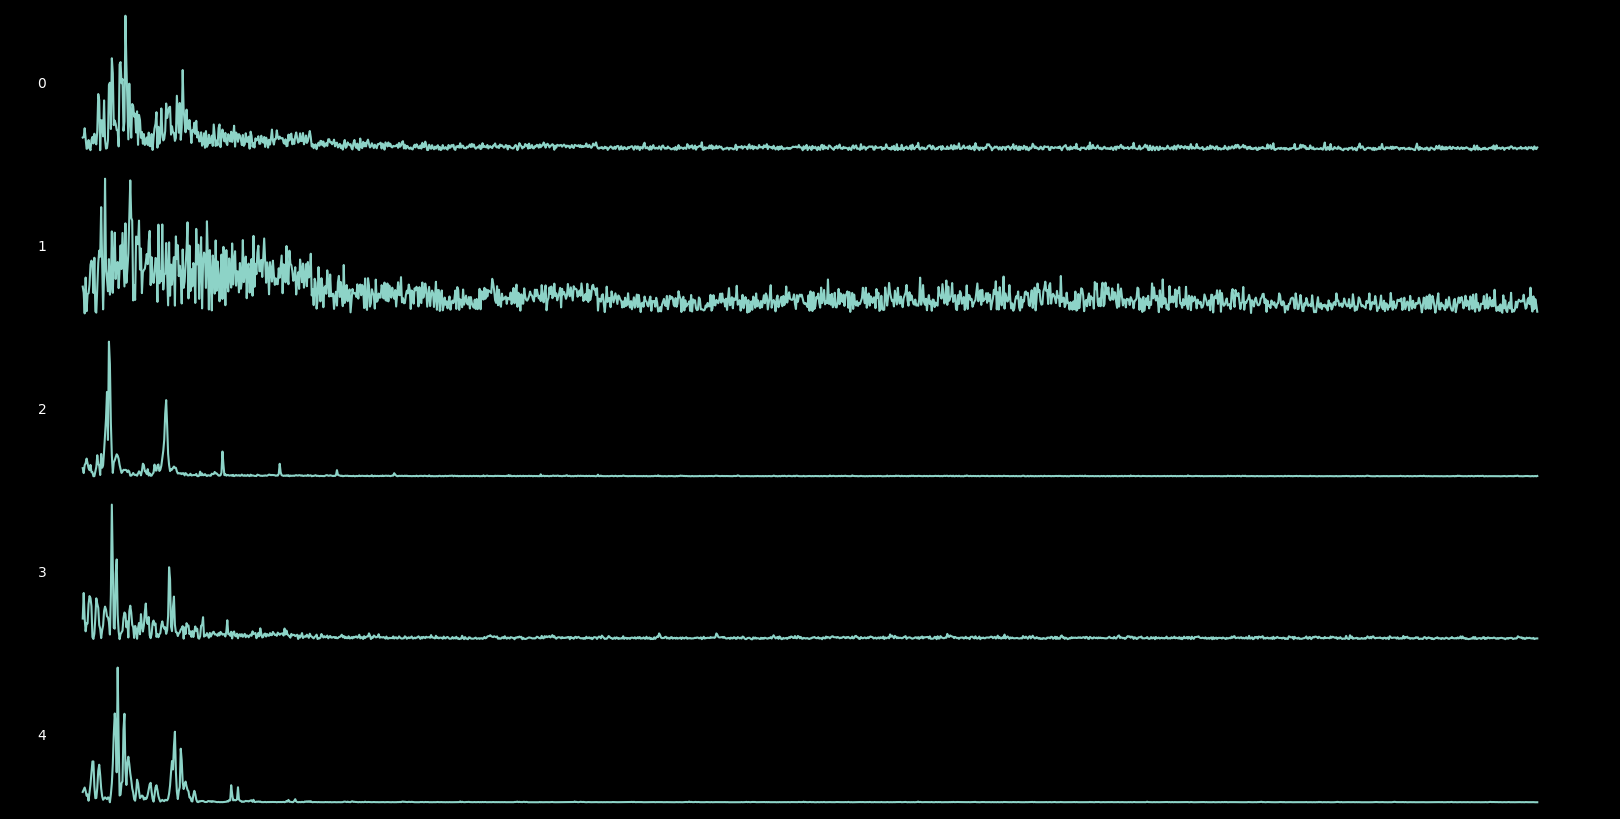

In [14]:
columns = 1

fig, axes = plt.subplots(5, columns, figsize=(20, 10))

for i in range(5):
    for j in range(columns):
        ax = axes[i]
        ax.plot(normalized_data[4][i].reshape(-1, 1)[:1500])
        ax.axis('off')
        ax.text(0.02, 0.5, f'{i}', transform=ax.transAxes, ha='center', va='center')
        

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

In [17]:
# rows = 11

# for k in range(5):
#     fig, axes = plt.subplots(rows, 1, figsize=(20, 2))

#     # x = X_normalized[k*10 +1]
#     for i in range(rows):
#         ax = axes[i]
#         ax.plot(x[i])
#         ax.axis('off')
#         ax.text(0.02, 0.5, f'{i}', transform=ax.transAxes, ha='center', va='center')
        
# plt.show()

In [19]:
normalized_data = np.squeeze(normalized_data)
normalized_data[4][0].shape

normalized_data[4][0]
np.sum(normalized_data[4][0], axis=1)

array([0.15781612, 0.11128744, 0.0586238 , 0.05444233, 0.02949491,
       0.02293599, 0.01680593, 0.01966747, 0.02301794, 0.01396782,
       0.01437861, 0.014694  , 0.01372938, 0.01394407, 0.01368928,
       0.01446523, 0.01352311, 0.01322159, 0.01320335, 0.01369622,
       0.01368825, 0.01218224, 0.01116495, 0.01067423, 0.01127616,
       0.0115434 , 0.01034853, 0.0098159 , 0.00960684, 0.0093655 ,
       0.008239  , 0.00784917, 0.00973486, 0.0104944 , 0.01033089,
       0.00978523, 0.00926588, 0.00810727, 0.00870678, 0.00812821,
       0.00715804, 0.00718693, 0.00732976, 0.00795467, 0.00751374,
       0.00698495, 0.00683161, 0.00640589, 0.00695825, 0.00631378,
       0.00546723])

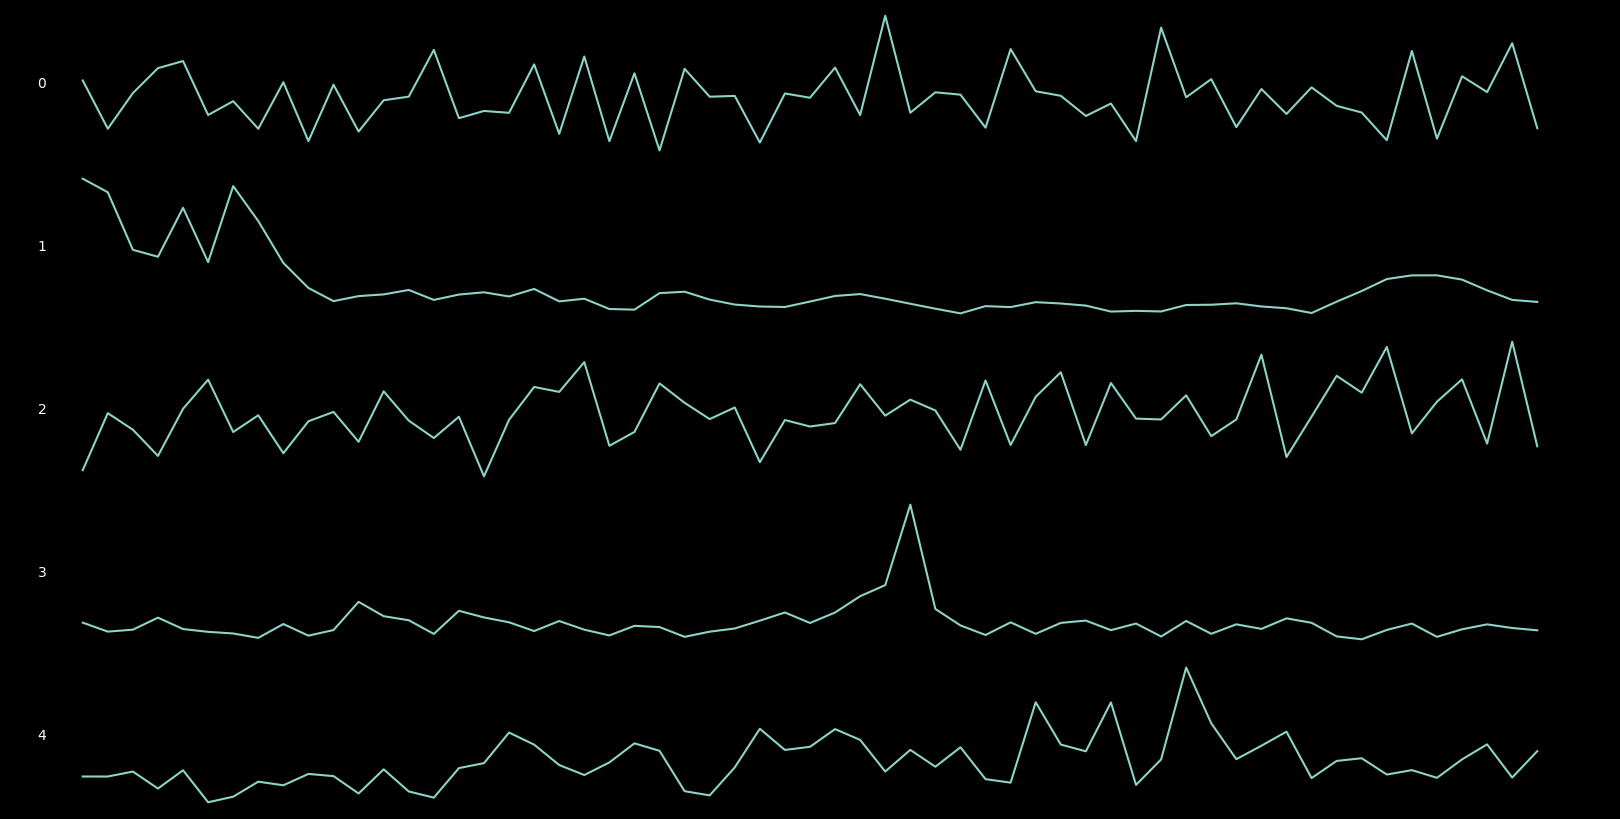

In [21]:
columns = 1

fig, axes = plt.subplots(5, columns, figsize=(20, 10))

for i in range(5):
    for j in range(columns):
        ax = axes[i]
        ax.plot(np.sum(normalized_data[i][0], axis=0))
        ax.axis('off')
        ax.text(0.02, 0.5, f'{i}', transform=ax.transAxes, ha='center', va='center')
        

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)

plt.show()

In [75]:
d0 = [] 
pa = 'EEG_Data/0'
for p in os.listdir(pa):
    paa = os.path.join(pa, p)
    d0.append(np.load(paa))

d0 = np.array(d0)
d0.shape

(2906, 51, 59, 1)

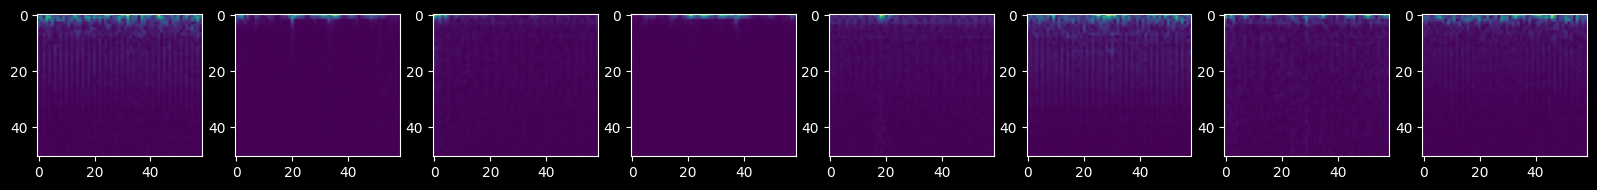

In [76]:
row = 1
columns = 8

fig, axes = plt.subplots(row, columns, figsize=(20, 10))

for i in range(columns):
    ax = axes[i]
    ax.imshow(d0[i])
    

In [18]:
class SpectrogramPreprocessor:
    def __init__(self, normalize='standard', freq_range=None, 
                 noise_reduction=True, db_conversion=True):
        self.normalize = normalize
        self.freq_range = freq_range
        self.noise_reduction = noise_reduction
        self.db_conversion = db_conversion
        self.scaler = None
        
    def fit(self, spectrograms):
        if self.normalize:
            shape = spectrograms.shape
            if self.normalize == 'standard':
                self.scaler = StandardScaler()
            elif self.normalize == 'minmax':
                self.scaler = MinMaxScaler()
            self.scaler.fit(spectrograms.reshape(-1, 1))
    
    def transform(self, spectrograms):
        specs = spectrograms.copy()
        
        if self.db_conversion:
            specs = librosa.amplitude_to_db(specs, ref=np.max)
        
        if self.noise_reduction:
            noise_floor = np.mean(specs, axis=(1, 2), keepdims=True) - \
                         2 * np.std(specs, axis=(1, 2), keepdims=True)
            specs = np.maximum(specs, noise_floor)
        
        if self.freq_range is not None:
            specs = specs[:, self.freq_range[0]:self.freq_range[1], :]
        
        if self.scaler is not None:
            original_shape = specs.shape
            specs = self.scaler.transform(
                specs.reshape(-1, 1)
            ).reshape(original_shape)
        
        return specs

In [19]:
preprocessor = SpectrogramPreprocessor(
    normalize='standard',
    freq_range=(0, 60),
    noise_reduction=True,
    db_conversion=True
)

In [15]:
X = []
Y = []
data_path = 'EEG_Data'
for dir in os.listdir(data_path):
    folder_path = os.path.join(data_path, dir)
    dirs = os.listdir(folder_path)
    
    print(f'Number of samples in class {dir}: {len(dirs)}')
    
    xs = []
    ys = []
    
    for file in dirs:
        file_path = os.path.join(folder_path, file)
        spectrogram = np.load(file_path)
        xs.append(spectrogram)
        ys.append(int(dir))
    
    xs = np.array(xs)
    ys = np.array(ys)
    
    X.extend(xs)
    Y.extend(ys)

X = np.array(X)
Y = np.array(Y)

X = np.array([((x - x.mean()) / (x.std() + 1e-8)) for x in X])

Number of samples in class 0: 2906
Number of samples in class 1: 237
Number of samples in class 2: 1755
Number of samples in class 3: 497
Number of samples in class 4: 418


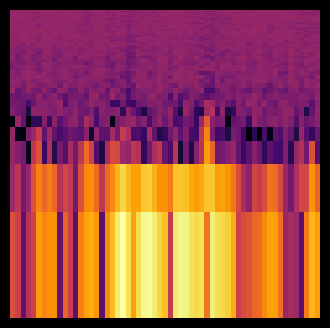

In [20]:
preprocessor.fit(X)
spec2 = preprocessor.transform(X[3])

plt.figure(figsize=(4, 4))
plt.axis('off')
librosa.display.specshow(np.squeeze(spec2), y_axis='log', cmap='inferno');

In [ ]:
images_path = 'EEG_Data_Processed2'

for i in range(len(X)):
    im = spec2 = preprocessor.transform(X[i])
    f_path = os.path.join(images_path, str(Y[i]))
    f_path = os.path.join(f_path, f'{i}')
    print(f_path)
    plt.figure(figsize=(4, 4))
    plt.axis('off')
    librosa.display.specshow(np.squeeze(im), y_axis='log', cmap='inferno');
    plt.savefig(f_path + '.png', bbox_inches='tight', pad_inches=0)
    plt.close()

In [21]:
import torch
import torchaudio
import torchaudio.transforms as T

import numpy as np
import librosa
import librosa.display
import random
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import map_coordinates


In [37]:

def time_warping(spec, W=5):
    """
    Applies time warping to a spectrogram.
    W: Maximum time warp distance.
    """
    num_rows, num_cols = spec.shape
    center_col = num_cols // 2
    warp_dist = random.randint(-W, W)
    
    source_points = np.array([[center_col, 0], [center_col, num_rows - 1]])
    dest_points = np.array([[center_col + warp_dist, 0], [center_col + warp_dist, num_rows - 1]])
    
    warped_spec = map_coordinates(spec, 
                                   [np.linspace(0, num_rows - 1, num_rows),
                                    np.interp(np.linspace(0, num_rows - 1, num_rows), source_points[:, 0], dest_points[:, 0])],
                                   order=1, mode='reflect')
    return warped_spec

def frequency_masking(spec, F=10):
    """
    Applies frequency masking to a spectrogram.
    F: Maximum width of the frequency mask.
    """
    num_mel_channels = spec.shape[0]
    f = random.randint(0, F)
    f0 = random.randint(0, num_mel_channels - f)
    
    # print(spec.shape)
    spec[f0:f0 + f, :] = 0
    return spec

def time_masking(spec, T=10):
    """
    Applies time masking to a spectrogram.
    T: Maximum width of the time mask.
    """
    num_time_steps = spec.shape[1]
    t = random.randint(0, T)
    t0 = random.randint(0, num_time_steps - t)
    spec[:, t0:t0 + t] = 0  
    return spec

def augment_spec(spec, W=5, F=10, T=20, apply_time_warp=True):
    if apply_time_warp:
        spec = time_warping(spec, W)
    spec = frequency_masking(spec, F)
    spec = time_masking(spec, T)
    return spec

def save_augmented_spectrograms(X, Y, images_path, W=5, F=10, T=20, apply_time_warp=False):
    for i in range(len(X)):
        if (Y[i]!=1):
            continue
        im = preprocessor.transform(X[i])
        augmented_spec = augment_spec(im, W=W, F=F, T=T, apply_time_warp=apply_time_warp)
        
        f_path = os.path.join(images_path, str(Y[i]))
        f_path = os.path.join(f_path, f'{i}_4_aug')
        
        plt.figure(figsize=(4, 4))
        plt.axis('off')
        librosa.display.specshow(np.squeeze(augmented_spec), y_axis='log', cmap='inferno')
        plt.savefig(f_path + '.png', bbox_inches='tight', pad_inches=0)
        plt.close()
        # break

# Example usage
# Assuming `X` contains the log mel spectrograms and `Y` contains the corresponding labels
images_path = 'EEG_Data_Processed2'
save_augmented_spectrograms(X, Y, images_path)

In [38]:

print(len(os.listdir('EEG_Data_Processed2/0')))
print(len(os.listdir('EEG_Data_Processed2/1')))
print(len(os.listdir('EEG_Data_Processed2/2')))
print(len(os.listdir('EEG_Data_Processed2/3')))
print(len(os.listdir('EEG_Data_Processed2/4')))

2907
1185
1755
1491
1254
